In [12]:
#learning xarray
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
#matplotlib.use('Agg')
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy import stats
import time
#import numexpr as ne
import xarray as xr
rEarth = 6371220. #in m ##  get from file variable #f_in.sphere_radius
import glob
from netCDF4 import Dataset
import _pickle as pickle


#concat all 2d to 3d to include all realizations in one array.
def concat_allrlzn(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11):
    max_shape = [0,0]
    for a in [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11]:
        if max_shape[0] < a.shape[0]:
            max_shape[0] = a.shape[0]
        if max_shape[1] < a.shape[1]:
            max_shape[1] = a.shape[1]
    arrays = []

    for a in [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11]:
        arrays.append(np.pad(a, pad_width=((0, max_shape[0] - a.shape[0]),
                                       (0, max_shape[1] - a.shape[1])),
                         mode='constant'))
    allrlzn = np.stack(arrays)
    
    return allrlzn

In [13]:
mux  =(concat_allrlzn(pickle.load(open("mux_81_1028.p","rb")),pickle.load(open("mux_82_1028.p","rb")),pickle.load(open("mux_83_1028.p","rb")),pickle.load(open("mux_84_1028.p","rb")),pickle.load(open("mux_85_1028.p","rb")),pickle.load(open("mux_86_1028.p","rb")),pickle.load(open("mux_88_1028.p","rb")),pickle.load(open("mux_83_6_1028.p","rb")),pickle.load(open("mux_84_6_1028.p","rb")),pickle.load(open("mux_85_6_1028.p","rb")),pickle.load(open("mux_86_6_1028.p","rb"))))
muy  =(concat_allrlzn(pickle.load(open("muy_81_1028.p","rb")),pickle.load(open("muy_82_1028.p","rb")),pickle.load(open("muy_83_1028.p","rb")),pickle.load(open("muy_84_1028.p","rb")),pickle.load(open("muy_85_1028.p","rb")),pickle.load(open("muy_86_1028.p","rb")),pickle.load(open("muy_88_1028.p","rb")),pickle.load(open("muy_83_6_1028.p","rb")),pickle.load(open("muy_84_6_1028.p","rb")),pickle.load(open("muy_85_6_1028.p","rb")),pickle.load(open("muy_86_6_1028.p","rb"))))
urms =(concat_allrlzn(pickle.load(open("urms_81_1028.p","rb")),pickle.load(open("urms_82_1028.p","rb")),pickle.load(open("urms_83_1028.p","rb")),pickle.load(open("urms_84_1028.p","rb")),pickle.load(open("urms_85_1028.p","rb")),pickle.load(open("urms_86_1028.p","rb")),pickle.load(open("urms_88_1028.p","rb")),pickle.load(open("urms_83_6_1028.p","rb")),pickle.load(open("urms_84_6_1028.p","rb")),pickle.load(open("urms_85_6_1028.p","rb")),pickle.load(open("urms_86_6_1028.p","rb"))))
vrms =(concat_allrlzn(pickle.load(open("vrms_81_1028.p","rb")),pickle.load(open("vrms_82_1028.p","rb")),pickle.load(open("vrms_83_1028.p","rb")),pickle.load(open("vrms_84_1028.p","rb")),pickle.load(open("vrms_85_1028.p","rb")),pickle.load(open("vrms_86_1028.p","rb")),pickle.load(open("vrms_88_1028.p","rb")),pickle.load(open("vrms_83_6_1028.p","rb")),pickle.load(open("vrms_84_6_1028.p","rb")),pickle.load(open("vrms_85_6_1028.p","rb")),pickle.load(open("vrms_86_6_1028.p","rb"))))
Npart=(concat_allrlzn(pickle.load(open("Npart_81_1028.p","rb")),pickle.load(open("Npart_82_1028.p","rb")),pickle.load(open("Npart_83_1028.p","rb")),pickle.load(open("Npart_84_1028.p","rb")),pickle.load(open("Npart_85_1028.p","rb")),pickle.load(open("Npart_86_1028.p","rb")),pickle.load(open("Npart_88_1028.p","rb")),pickle.load(open("Npart_83_6_1028.p","rb")),pickle.load(open("Npart_84_6_1028.p","rb")),pickle.load(open("Npart_85_6_1028.p","rb")),pickle.load(open("Npart_86_6_1028.p","rb"))))
umean=(concat_allrlzn(pickle.load(open("umean_81_1028.p","rb")),pickle.load(open("umean_82_1028.p","rb")),pickle.load(open("umean_83_1028.p","rb")),pickle.load(open("umean_84_1028.p","rb")),pickle.load(open("umean_85_1028.p","rb")),pickle.load(open("umean_86_1028.p","rb")),pickle.load(open("umean_88_1028.p","rb")),pickle.load(open("umean_83_6_1028.p","rb")),pickle.load(open("umean_84_6_1028.p","rb")),pickle.load(open("umean_85_6_1028.p","rb")),pickle.load(open("umean_86_6_1028.p","rb"))))
vmean=(concat_allrlzn(pickle.load(open("vmean_81_1028.p","rb")),pickle.load(open("vmean_82_1028.p","rb")),pickle.load(open("vmean_83_1028.p","rb")),pickle.load(open("vmean_84_1028.p","rb")),pickle.load(open("vmean_85_1028.p","rb")),pickle.load(open("vmean_86_1028.p","rb")),pickle.load(open("vmean_88_1028.p","rb")),pickle.load(open("vmean_83_6_1028.p","rb")),pickle.load(open("vmean_84_6_1028.p","rb")),pickle.load(open("vmean_85_6_1028.p","rb")),pickle.load(open("vmean_86_6_1028.p","rb"))))
drdr =(concat_allrlzn(pickle.load(open("drdr_81_1028.p","rb")),pickle.load(open("drdr_82_1028.p","rb")),pickle.load(open("drdr_83_1028.p","rb")),pickle.load(open("drdr_84_1028.p","rb")),pickle.load(open("drdr_85_1028.p","rb")),pickle.load(open("drdr_86_1028.p","rb")),pickle.load(open("drdr_88_1028.p","rb")),pickle.load(open("drdr_83_6_1028.p","rb")),pickle.load(open("drdr_84_6_1028.p","rb")),pickle.load(open("drdr_85_6_1028.p","rb")),pickle.load(open("drdr_86_6_1028.p","rb"))))
dxdx =(concat_allrlzn(pickle.load(open("dxdx_81_1028.p","rb")),pickle.load(open("dxdx_82_1028.p","rb")),pickle.load(open("dxdx_83_1028.p","rb")),pickle.load(open("dxdx_84_1028.p","rb")),pickle.load(open("dxdx_85_1028.p","rb")),pickle.load(open("dxdx_86_1028.p","rb")),pickle.load(open("dxdx_88_1028.p","rb")),pickle.load(open("dxdx_83_6_1028.p","rb")),pickle.load(open("dxdx_84_6_1028.p","rb")),pickle.load(open("dxdx_85_6_1028.p","rb")),pickle.load(open("dxdx_86_6_1028.p","rb"))))
dxdy =(concat_allrlzn(pickle.load(open("dxdy_81_1028.p","rb")),pickle.load(open("dxdy_82_1028.p","rb")),pickle.load(open("dxdy_83_1028.p","rb")),pickle.load(open("dxdy_84_1028.p","rb")),pickle.load(open("dxdy_85_1028.p","rb")),pickle.load(open("dxdy_86_1028.p","rb")),pickle.load(open("dxdy_88_1028.p","rb")),pickle.load(open("dxdy_83_6_1028.p","rb")),pickle.load(open("dxdy_84_6_1028.p","rb")),pickle.load(open("dxdy_85_6_1028.p","rb")),pickle.load(open("dxdy_86_6_1028.p","rb"))))
dydy =(concat_allrlzn(pickle.load(open("dydy_81_1028.p","rb")),pickle.load(open("dydy_82_1028.p","rb")),pickle.load(open("dydy_83_1028.p","rb")),pickle.load(open("dydy_84_1028.p","rb")),pickle.load(open("dydy_85_1028.p","rb")),pickle.load(open("dydy_86_1028.p","rb")),pickle.load(open("dydy_88_1028.p","rb")),pickle.load(open("dydy_83_6_1028.p","rb")),pickle.load(open("dydy_84_6_1028.p","rb")),pickle.load(open("dydy_85_6_1028.p","rb")),pickle.load(open("dydy_86_6_1028.p","rb"))))
depth =(concat_allrlzn(pickle.load(open("depth_81_1028.p","rb")),pickle.load(open("depth_82_1028.p","rb")),pickle.load(open("depth_83_1028.p","rb")),pickle.load(open("depth_84_1028.p","rb")),pickle.load(open("depth_85_1028.p","rb")),pickle.load(open("depth_86_1028.p","rb")),pickle.load(open("depth_88_1028.p","rb")),pickle.load(open("depth_83_6_1028.p","rb")),pickle.load(open("depth_84_6_1028.p","rb")),pickle.load(open("depth_85_6_1028.p","rb")),pickle.load(open("depth_86_6_1028.p","rb"))))



In [14]:
pickle.dump(mux,open("./d_1027_c_1d_r50/mux.p","wb"))
pickle.dump(muy,open("./d_1027_c_1d_r50/muy.p","wb"))
pickle.dump(dxdx,open("./d_1027_c_1d_r50/dxdx.p","wb"))
pickle.dump(dydy,open("./d_1027_c_1d_r50/dydy.p","wb"))
pickle.dump(dxdy,open("./d_1027_c_1d_r50/dxdy.p","wb"))
pickle.dump(drdr,open("./d_1027_c_1d_r50/drdr.p","wb"))
pickle.dump(Npart,open("./d_1027_c_1d_r50/Npart.p","wb"))
pickle.dump(depth,open("./d_1027_c_1d_r50/depth.p","wb"))
pickle.dump(urms,open("./d_1027_c_1d_r50/urms.p","wb"))
pickle.dump(vrms,open("./d_1027_c_1d_r50/vrms.p","wb"))
pickle.dump(umean,open("./d_1027_c_1d_r50/umean.p","wb"))
pickle.dump(vmean,open("./d_1027_c_1d_r50/vmean.p","wb"))    

(array([1576.,  182.,  172.,  759., 1172., 1078.,  977.,  893.,  875.,
         917.]),
 array([  0. ,  63.3, 126.6, 189.9, 253.2, 316.5, 379.8, 443.1, 506.4,
        569.7, 633. ]),
 <BarContainer object of 10 artists>)

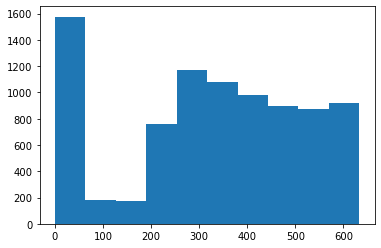

In [9]:

plt.hist(Npart[0,0,:])
